# Packages

In [678]:
from pathlib import Path

import dill
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import pendulum
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from imblearn.pipeline import Pipeline as imb_Pipeline
from loguru import logger
from sklearn import set_config
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix,
                             classification_report,
                             ConfusionMatrixDisplay,
                             roc_auc_score,
                             accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             RocCurveDisplay,
                             PrecisionRecallDisplay,
                            )
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, OneHotEncoder
from ucimlrepo import fetch_ucirepo, list_available_datasets
from yellowbrick.classifier import DiscriminationThreshold
from scipy.stats import chi2_contingency
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer

set_config(display='diagram')
pd.set_option("display.max_columns", None)

In [679]:
import warnings
warnings.filterwarnings('ignore')

# Vue des données

In [681]:
data_churn = pd.read_csv("TP_ML2/telecom_customer_churn.csv", sep=",")

In [682]:
data_churn

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,NaN,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,NaN,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,NaN,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,13,Offer D,Yes,46.68,No,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,22,Offer D,Yes,16.20,Yes,Yes,Fiber Optic,17.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,2,Offer E,Yes,18.62,No,Yes,DSL,51.0,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,67,Offer A,Yes,2.12,No,Yes,Cable,58.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [683]:
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [684]:
data_churn = data_churn.drop(['Customer ID', 'Paperless Billing', 'Zip Code', 'Payment Method'], axis=1)

In [685]:
data_churn.duplicated().sum()

0

# EDA

### Variables qualitatives

In [688]:
vars_quali = data_churn.select_dtypes(exclude='number')
vars_quali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  7043 non-null   object
 1   Married                 7043 non-null   object
 2   City                    7043 non-null   object
 3   Offer                   3166 non-null   object
 4   Phone Service           7043 non-null   object
 5   Multiple Lines          6361 non-null   object
 6   Internet Service        7043 non-null   object
 7   Internet Type           5517 non-null   object
 8   Online Security         5517 non-null   object
 9   Online Backup           5517 non-null   object
 10  Device Protection Plan  5517 non-null   object
 11  Premium Tech Support    5517 non-null   object
 12  Streaming TV            5517 non-null   object
 13  Streaming Movies        5517 non-null   object
 14  Streaming Music         5517 non-null   object
 15  Unli

In [689]:
vars_quali = vars_quali.drop(['Churn Category', 'Churn Reason'], axis=1)

In [690]:
for col in vars_quali.columns:
    print(vars_quali[col].value_counts())
    print("-" * 40)

Gender
Male      3555
Female    3488
Name: count, dtype: int64
----------------------------------------
Married
No     3641
Yes    3402
Name: count, dtype: int64
----------------------------------------
City
Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Johannesburg          2
South Lake Tahoe      2
Jacumba               2
Holtville             2
Eldridge              2
Name: count, Length: 1106, dtype: int64
----------------------------------------
Offer
Offer B    824
Offer E    805
Offer D    602
Offer A    520
Offer C    415
Name: count, dtype: int64
----------------------------------------
Phone Service
Yes    6361
No      682
Name: count, dtype: int64
----------------------------------------
Multiple Lines
No     3390
Yes    2971
Name: count, dtype: int64
----------------------------------------
Internet Service
Yes    5517
No     1526
Name: count, dtype: int64
---------------------

#### Visualisation graphique

In [692]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

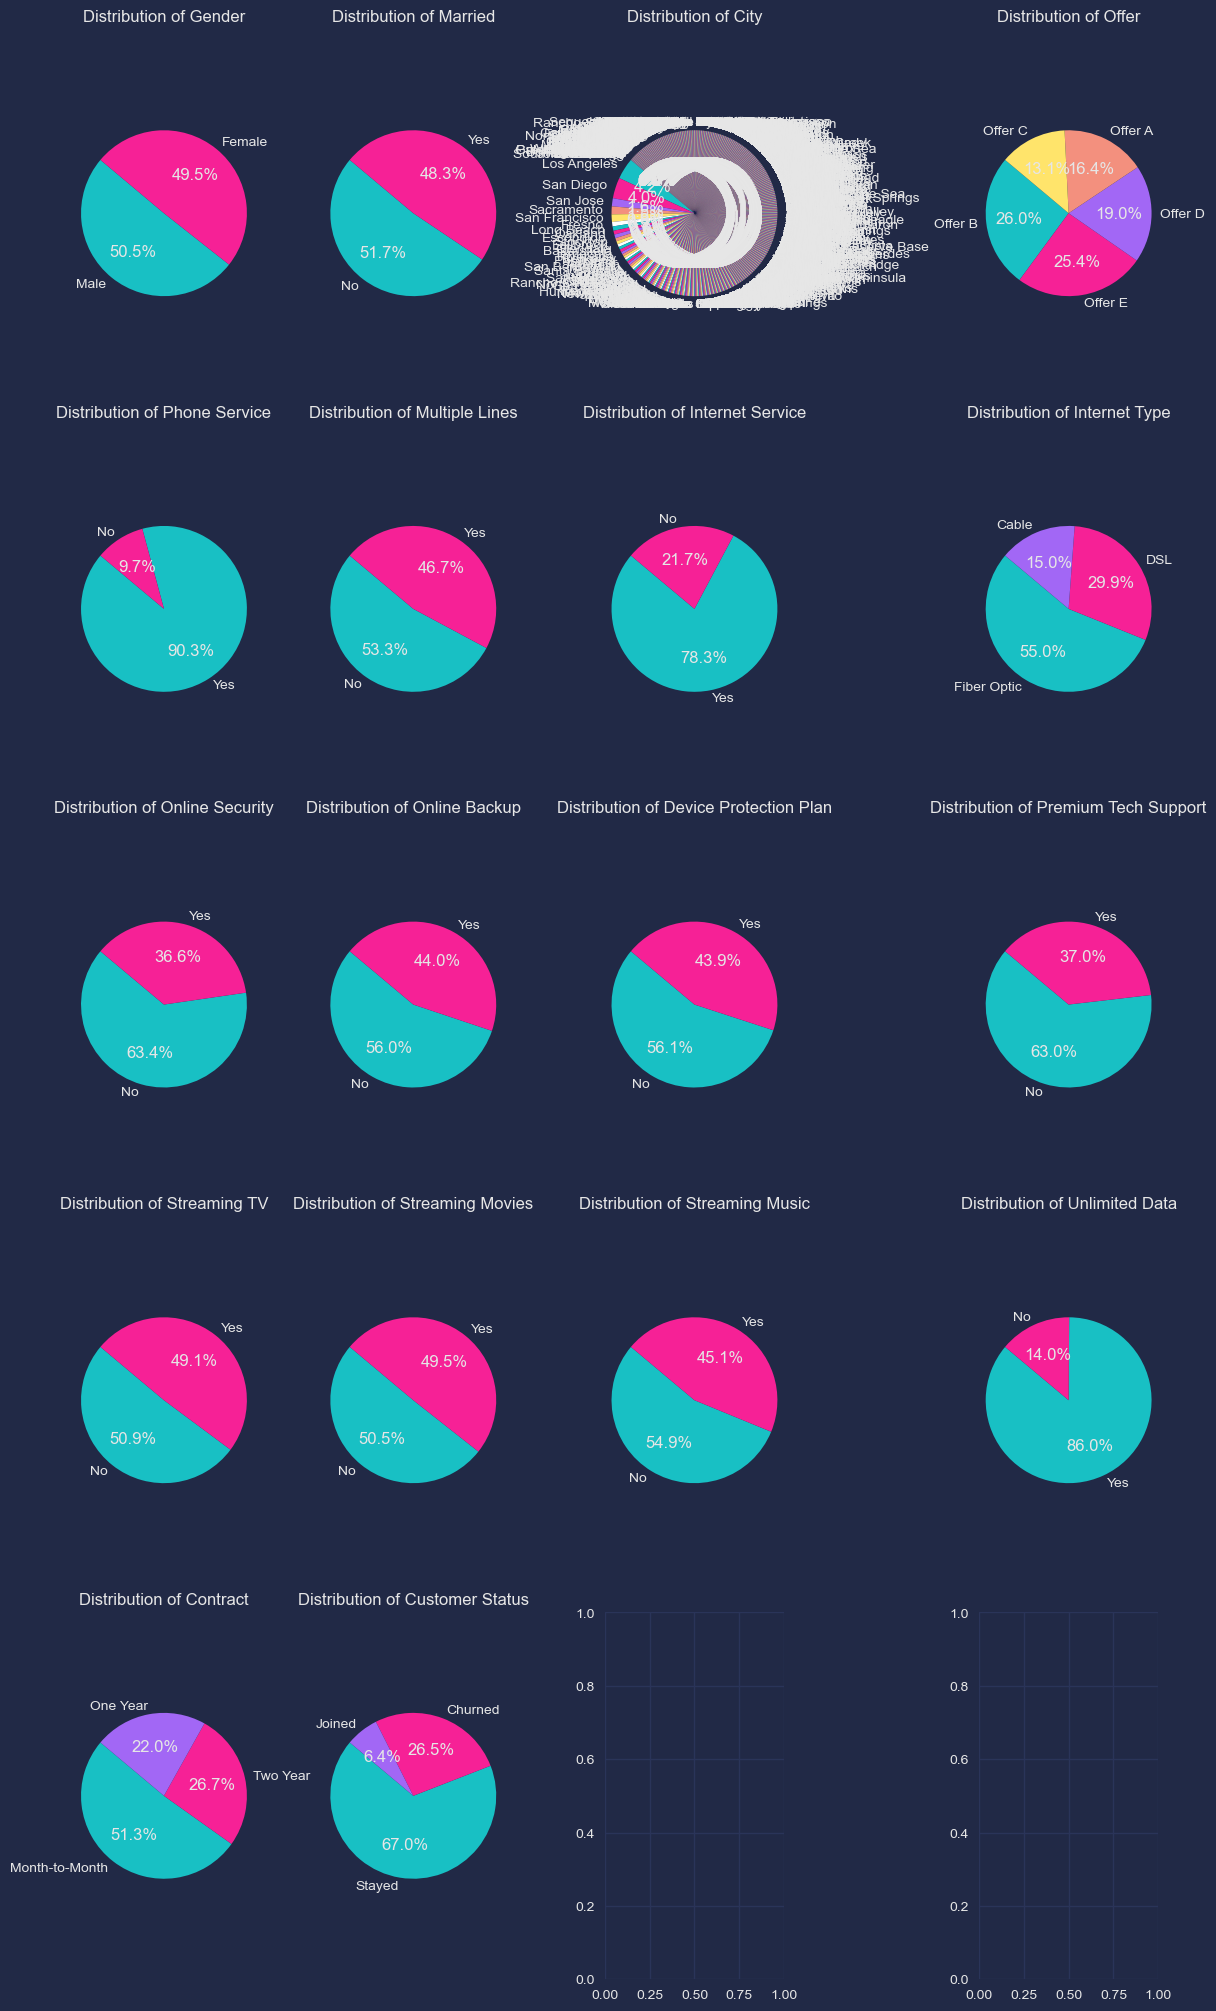

In [693]:
num_rows = 5
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 20), constrained_layout=True)

for i, column in enumerate(vars_quali.columns):
    categories = vars_quali[column].value_counts()
    ax = axes[i // num_cols, i % num_cols]
    
    ax.pie(categories, labels=categories.index, autopct='%1.1f%%', startangle=140)
    ax.axis('equal')
    ax.set_title(f'Distribution of {column}')

plt.show()

#### Traitement données manquantes

<Axes: >

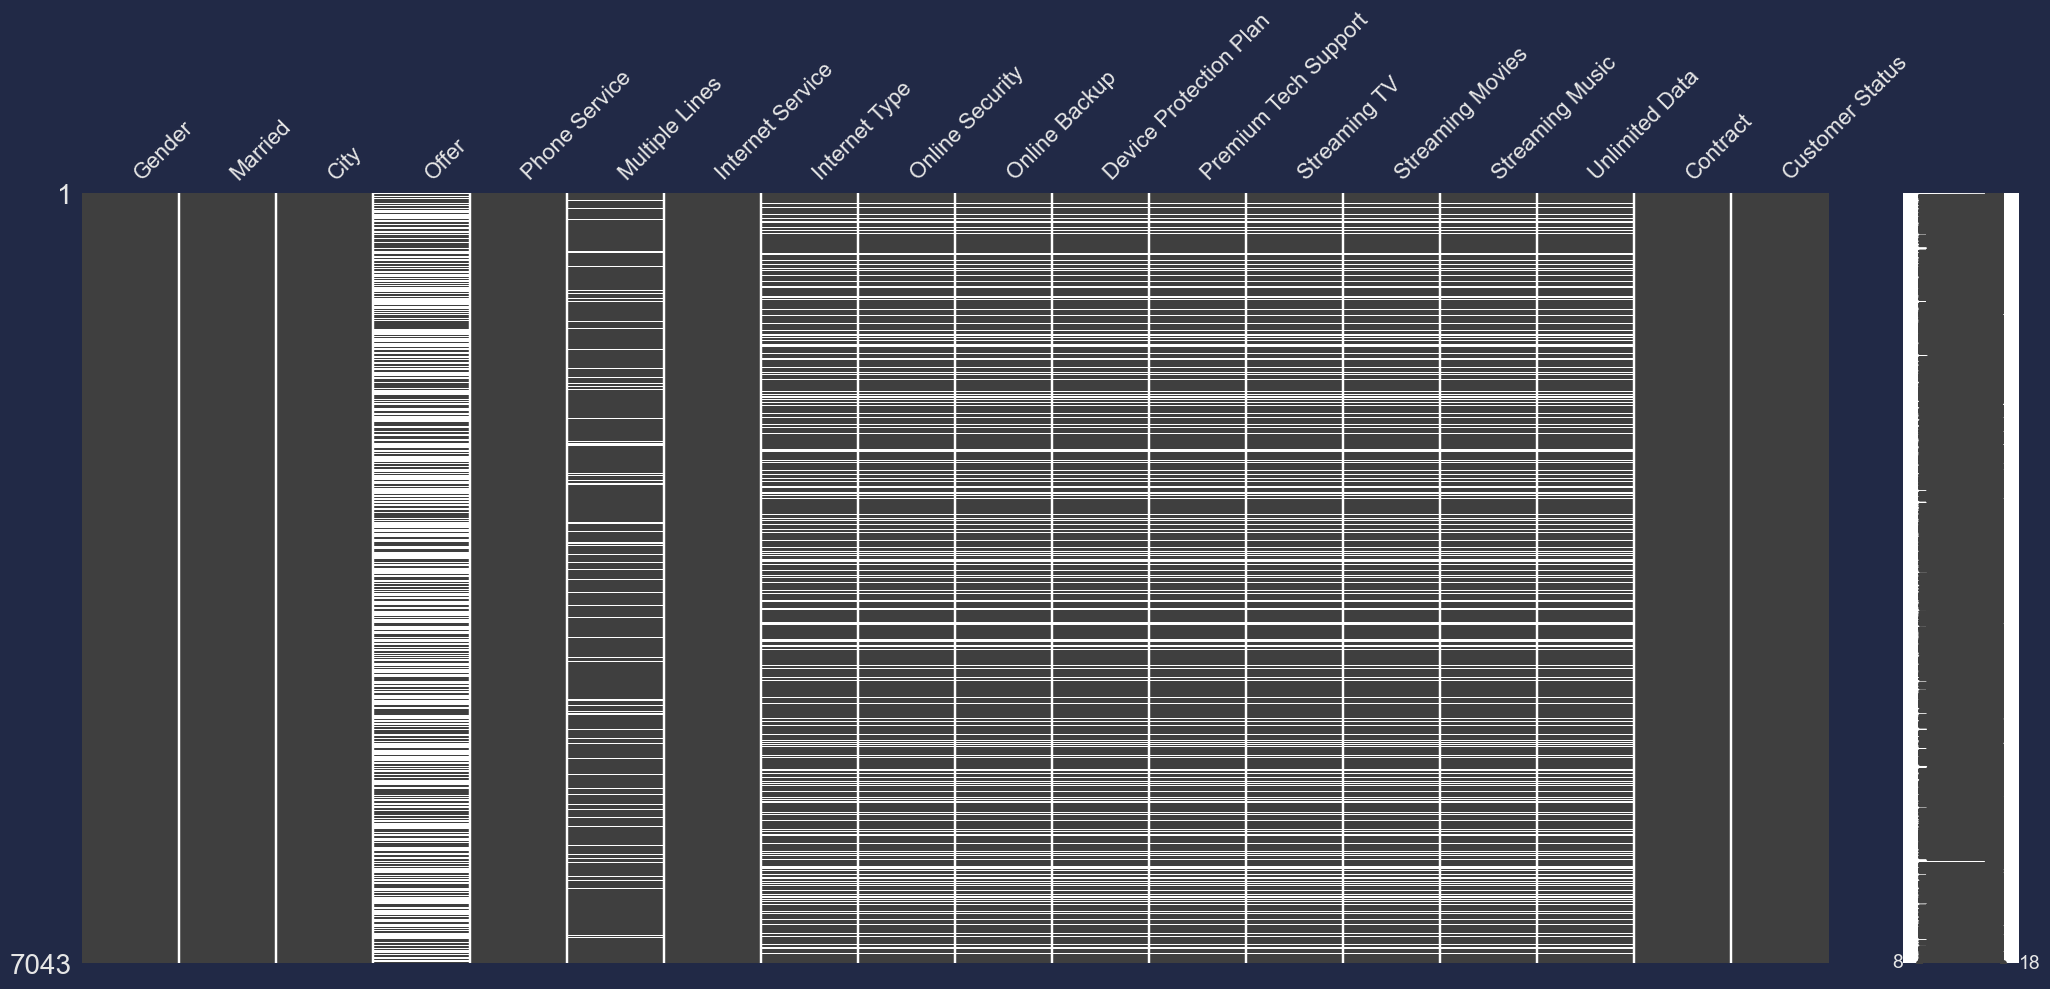

In [695]:
msno.matrix(vars_quali)

In [696]:
colonnes_manquantes = vars_quali.columns[vars_quali.isnull().any()]
print("Colonnes avec données manquantes :")
print(colonnes_manquantes)
print(vars_quali[colonnes_manquantes].isnull().sum())

Colonnes avec données manquantes :
Index(['Offer', 'Multiple Lines', 'Internet Type', 'Online Security',
       'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
       'Streaming TV', 'Streaming Movies', 'Streaming Music',
       'Unlimited Data'],
      dtype='object')
Offer                     3877
Multiple Lines             682
Internet Type             1526
Online Security           1526
Online Backup             1526
Device Protection Plan    1526
Premium Tech Support      1526
Streaming TV              1526
Streaming Movies          1526
Streaming Music           1526
Unlimited Data            1526
dtype: int64


In [697]:
vars_quali['Offer'] = vars_quali['Offer'].fillna('No')

###### Nous vérifions si les valeurs manquantes des variables liées à Phone Service ou Internet Service sont exclusivement dues à la modalité 'No' de ces variables.

In [699]:
def detect_lien(data, var_principale, vars_liees):
    for var in vars_liees:
        print(f"--- Analyse pour {var} ---")
        mask_nan = data[var].isna()
        ligne_result = (data.loc[mask_nan, var_principale] == 'No')
        print(ligne_result.to_list())
        print(f"Nombre de False pour {var} : {(~ligne_result).sum()}\n")

In [700]:
detect_lien(vars_quali, 'Phone Service', ['Multiple Lines'])

--- Analyse pour Multiple Lines ---
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, Tru

In [701]:
vars_quali.loc[vars_quali["Phone Service"] == "No", "Multiple Lines"] = "No"

In [702]:
# liste des variables qualitatives liées à internet
cols = [
    "Internet Type",
    "Online Security",
    "Online Backup",
    "Device Protection Plan",
    "Premium Tech Support",
    "Streaming TV",
    "Streaming Movies",
    "Streaming Music",
    "Unlimited Data"
]

In [703]:
detect_lien(vars_quali, 'Internet Service', cols)

--- Analyse pour Internet Type ---
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True

In [704]:
vars_quali[cols] = vars_quali[cols].fillna("No")

<Axes: >

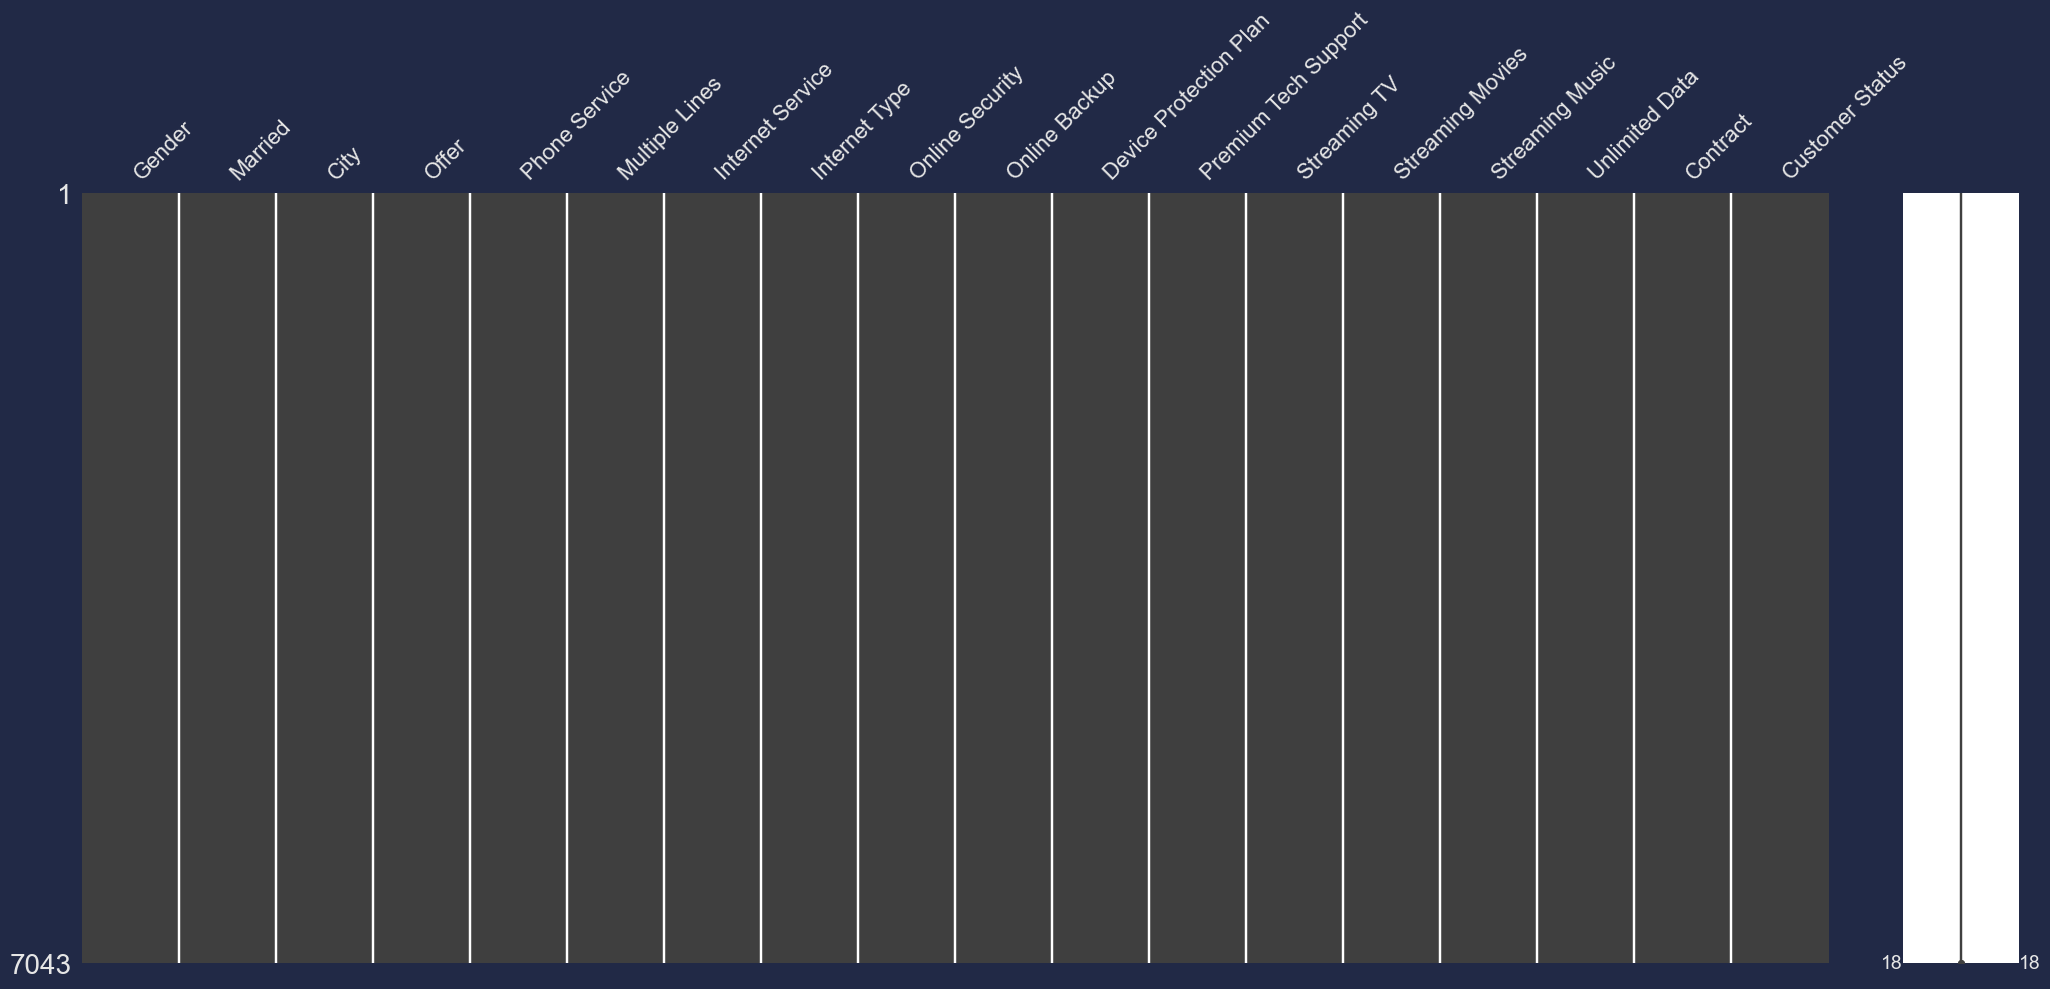

In [705]:
msno.matrix(vars_quali)

### Variables quantitatives

In [707]:
vars_quanti = data_churn.select_dtypes(include='number')
vars_quanti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                7043 non-null   int64  
 1   Number of Dependents               7043 non-null   int64  
 2   Latitude                           7043 non-null   float64
 3   Longitude                          7043 non-null   float64
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Avg Monthly Long Distance Charges  6361 non-null   float64
 7   Avg Monthly GB Download            5517 non-null   float64
 8   Monthly Charge                     7043 non-null   float64
 9   Total Charges                      7043 non-null   float64
 10  Total Refunds                      7043 non-null   float64
 11  Total Extra Data Charges           7043 non-null   int64

In [708]:
vars_quanti.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7043.0,46.509726,16.750352,19.000000,32.000000,46.000000,60.000000,80.000000
Number of Dependents,7043.0,0.468692,0.962802,0.000000,0.000000,0.000000,0.000000,9.000000
Latitude,7043.0,36.197455,2.468929,32.555828,33.990646,36.205465,38.161321,41.962127
Longitude,7043.0,-119.756684,2.154425,-124.301372,-121.788090,-119.595293,-117.969795,-114.192901
Number of Referrals,7043.0,1.951867,3.001199,0.000000,0.000000,0.000000,3.000000,11.000000
Tenure in Months,7043.0,32.386767,24.542061,1.000000,9.000000,29.000000,55.000000,72.000000
Avg Monthly Long Distance Charges,6361.0,25.420517,14.200374,1.010000,13.050000,25.690000,37.680000,49.990000
Avg Monthly GB Download,5517.0,26.189958,19.586585,2.000000,13.000000,21.000000,30.000000,85.000000
Monthly Charge,7043.0,63.596131,31.204743,-10.000000,30.400000,70.050000,89.750000,118.750000
Total Charges,7043.0,2280.381264,2266.220462,18.800000,400.150000,1394.550000,3786.600000,8684.800000


###### La variable Monthly Charge présente des valeurs négatives (minimum = -10), ce qui est incohérent dans un contexte de facturation. Pour corriger cette anomalie, nous recalculerons cette variable comme suit : Monthly Charge = Total Charges / Tenure in Months

#### Visualisation graphique

In [711]:
vars_quanti.columns

Index(['Age', 'Number of Dependents', 'Latitude', 'Longitude',
       'Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

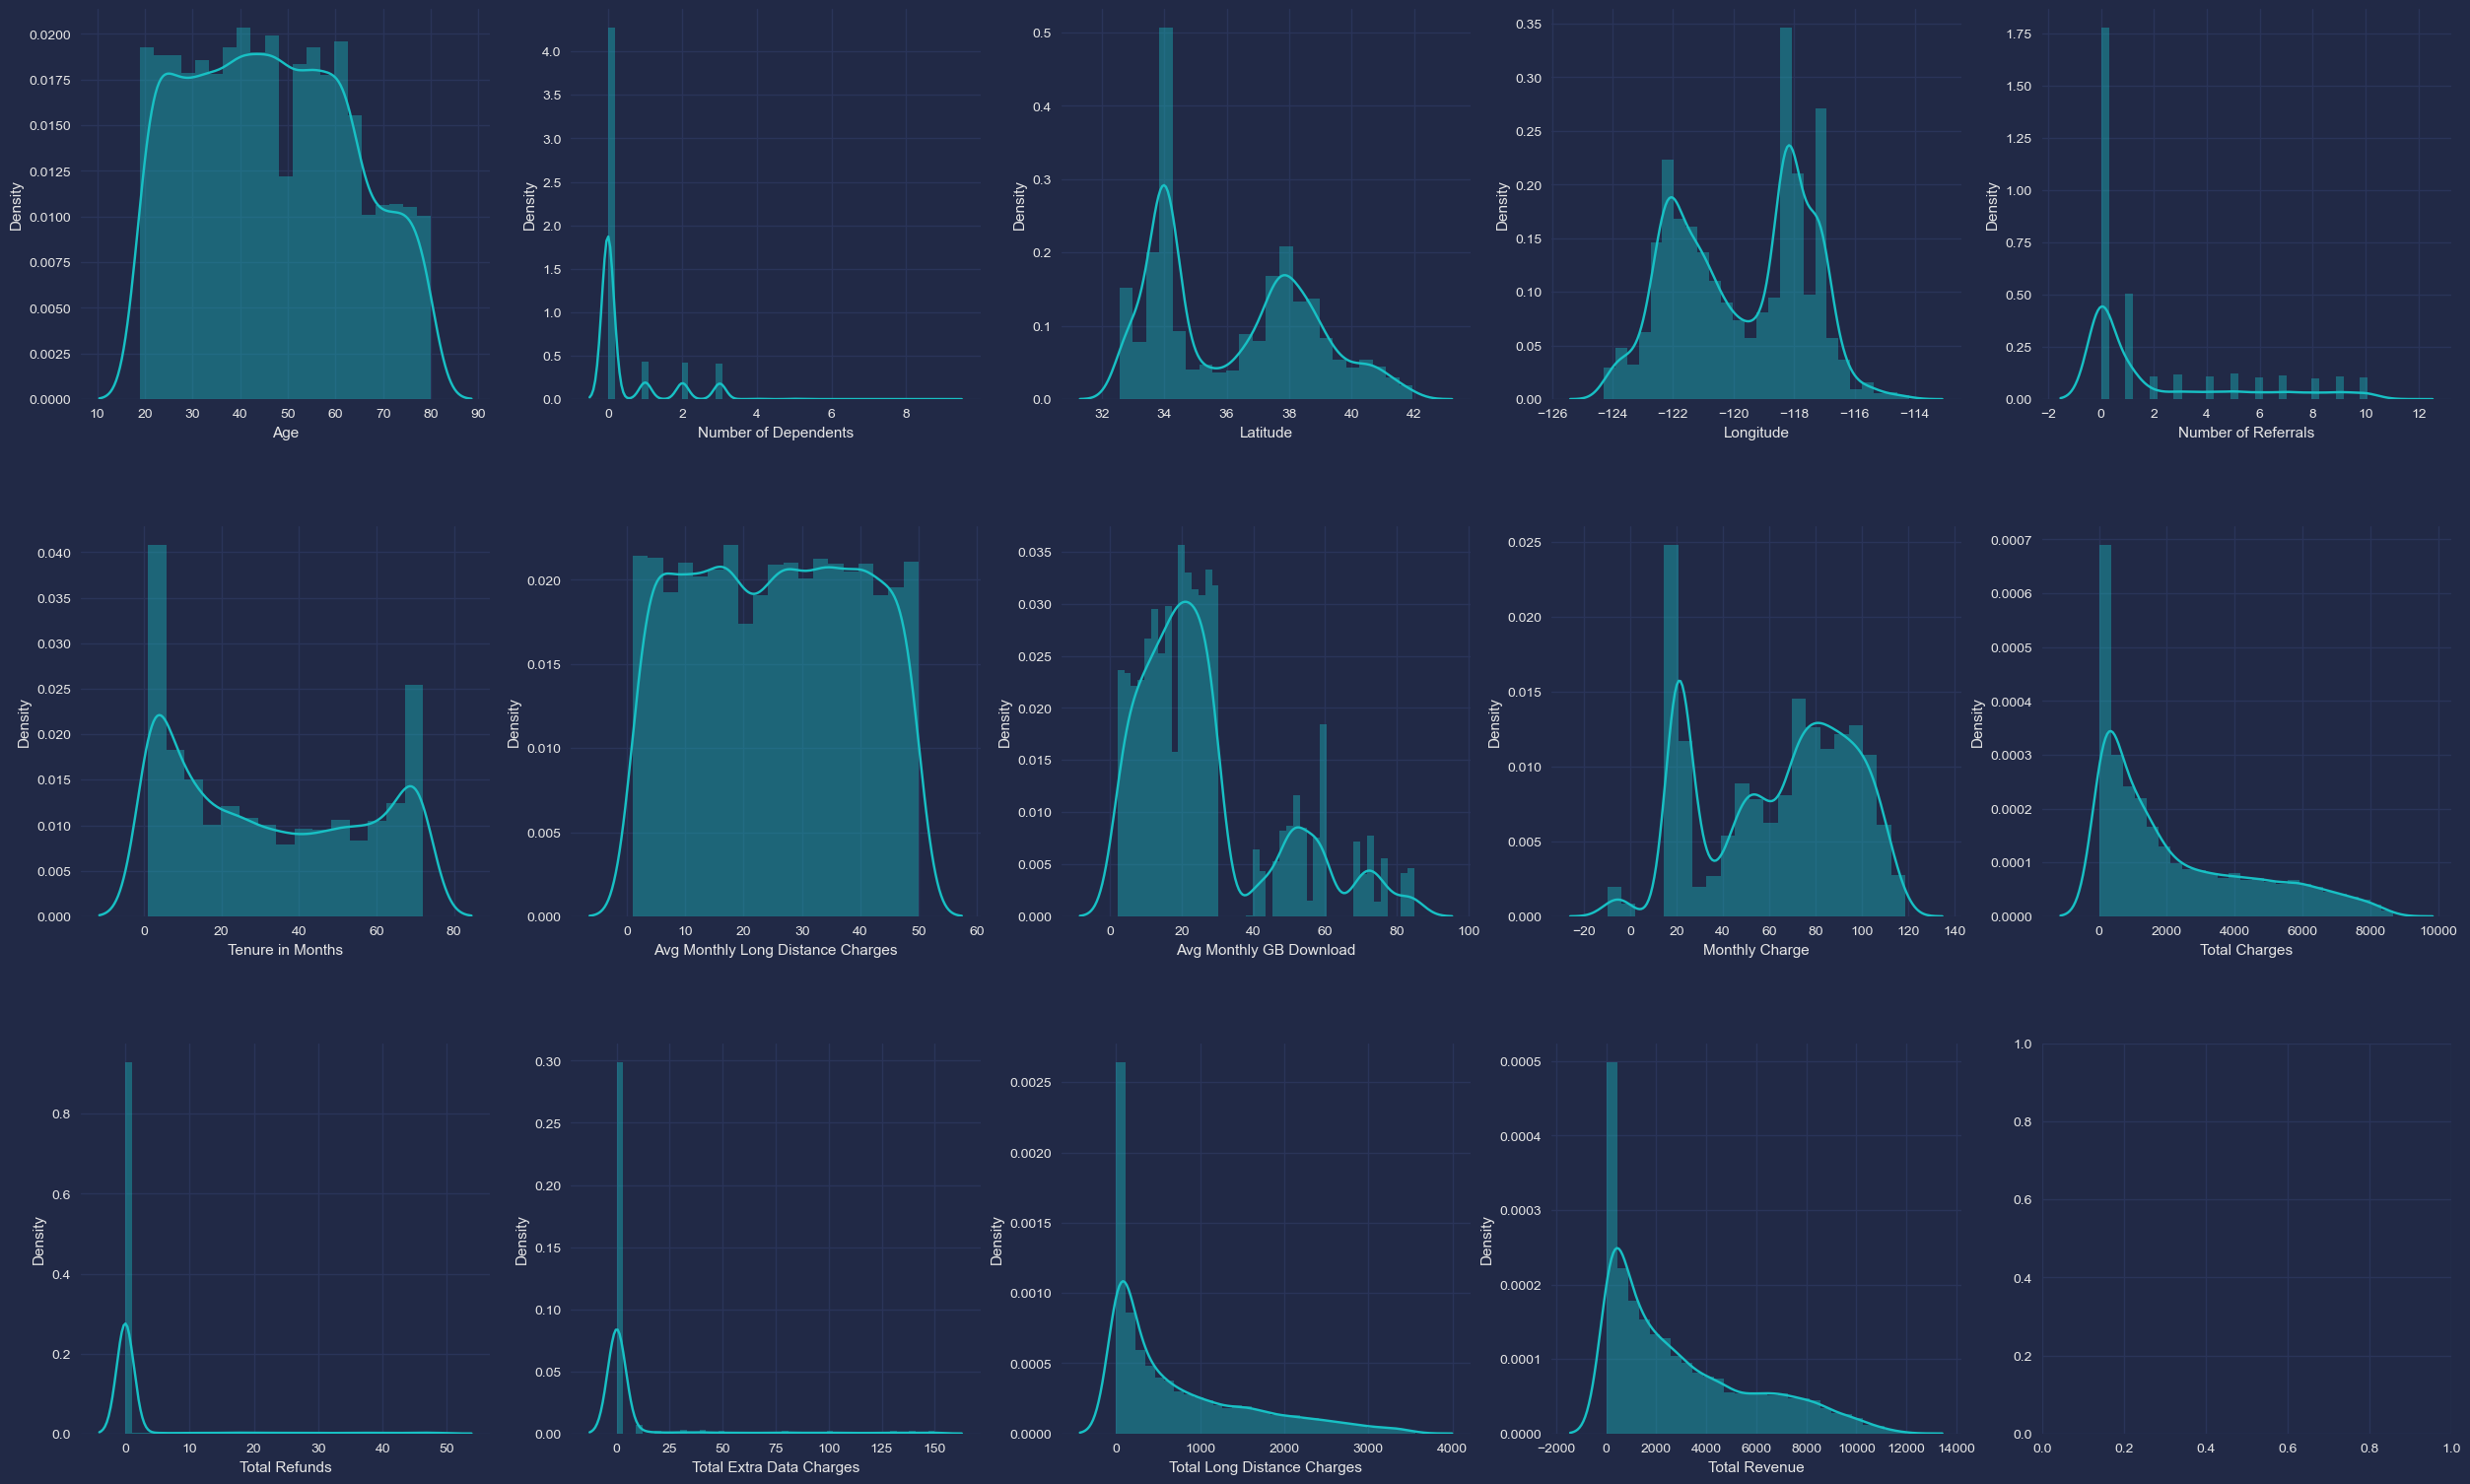

In [712]:
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(25,15))
index = 0
axs = axs.flatten()
for k, v in vars_quanti.items():
  sns.distplot(v, ax=axs[index])
  index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5)

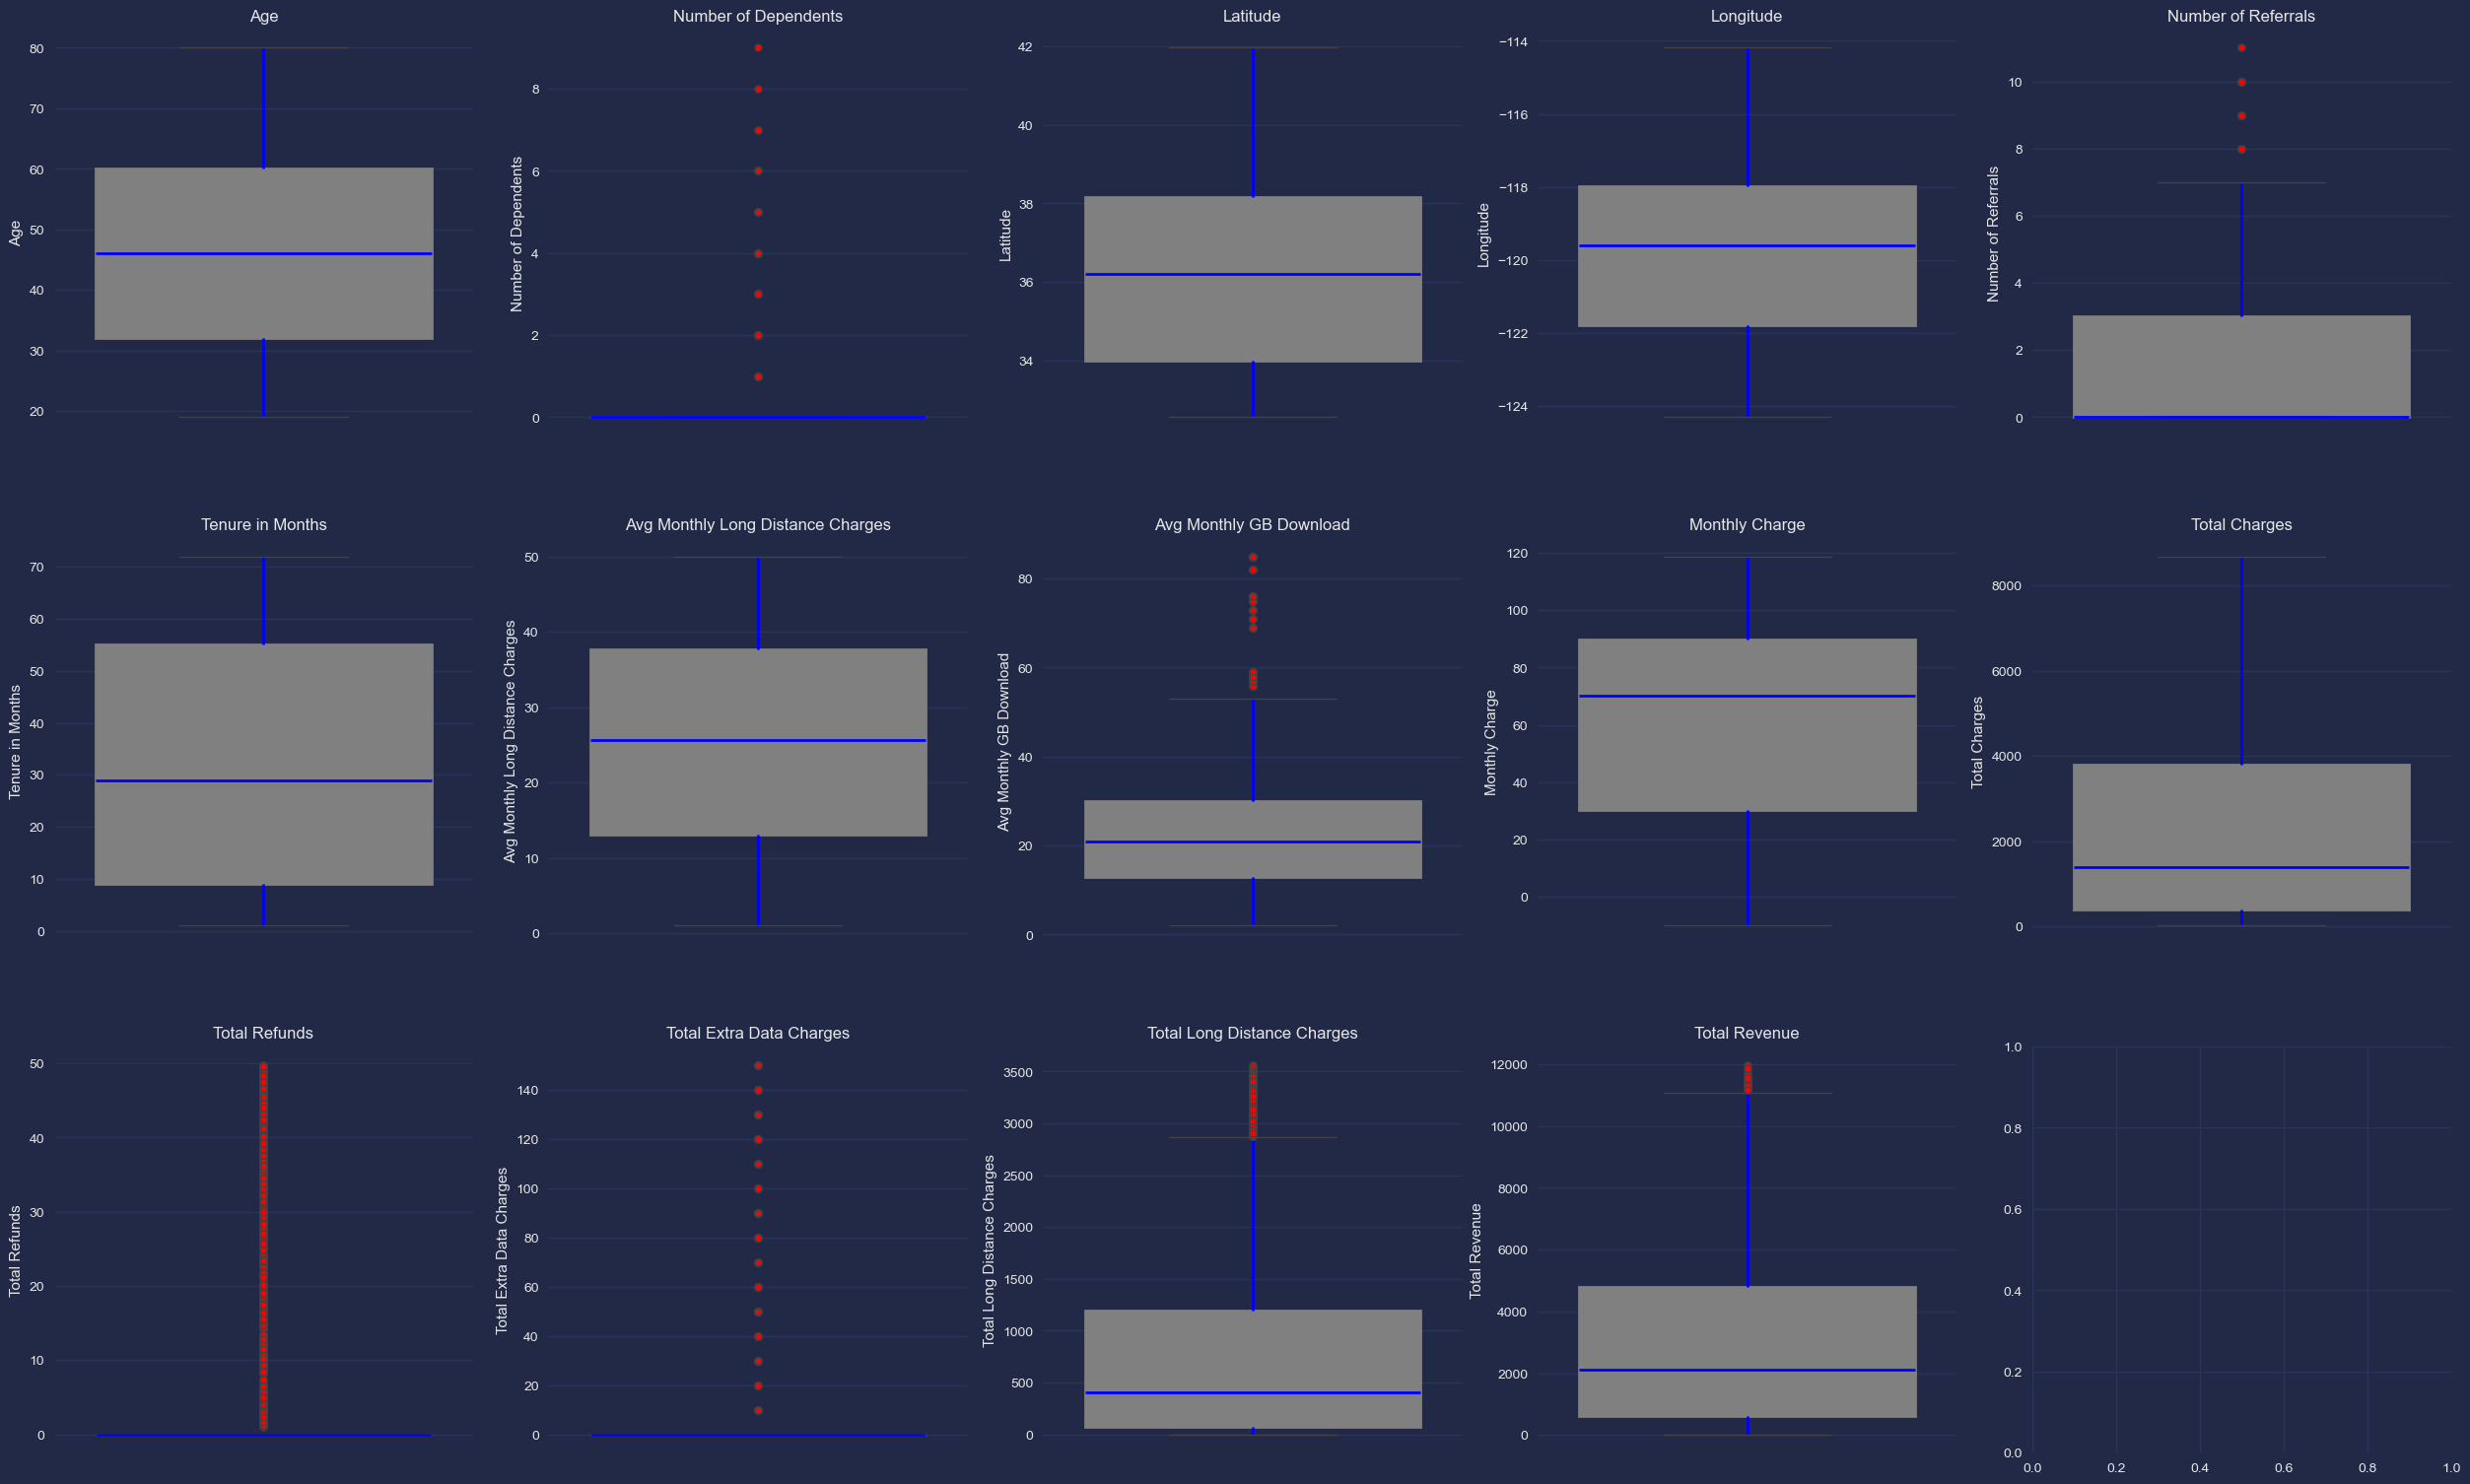

In [713]:
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(25, 15))
axs = axs.flatten()

flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')
whiskerprops = dict(color='blue', linewidth=2)
boxprops = dict(color='grey', linewidth=2)
medianprops = dict(color='blue', linewidth=2)

index = 0
for k, v in vars_quanti.items():
    sns.boxplot(y=v, ax=axs[index],
                flierprops=flierprops,
                whiskerprops=whiskerprops,
                boxprops=boxprops,
                medianprops=medianprops)
    
    axs[index].set_title(k)
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5)
plt.show()

Age                                      Avg Monthly GB Download
Number of Dependents                     Avg Monthly GB Download
Latitude                                               Longitude
Longitude                                               Latitude
Number of Referrals                             Tenure in Months
Tenure in Months                                   Total Revenue
Avg Monthly Long Distance Charges    Total Long Distance Charges
Avg Monthly GB Download                                      Age
Monthly Charge                                     Total Charges
Total Charges                                      Total Revenue
Total Refunds                                   Tenure in Months
Total Extra Data Charges                           Total Revenue
Total Long Distance Charges                        Total Revenue
Total Revenue                                      Total Charges
dtype: object

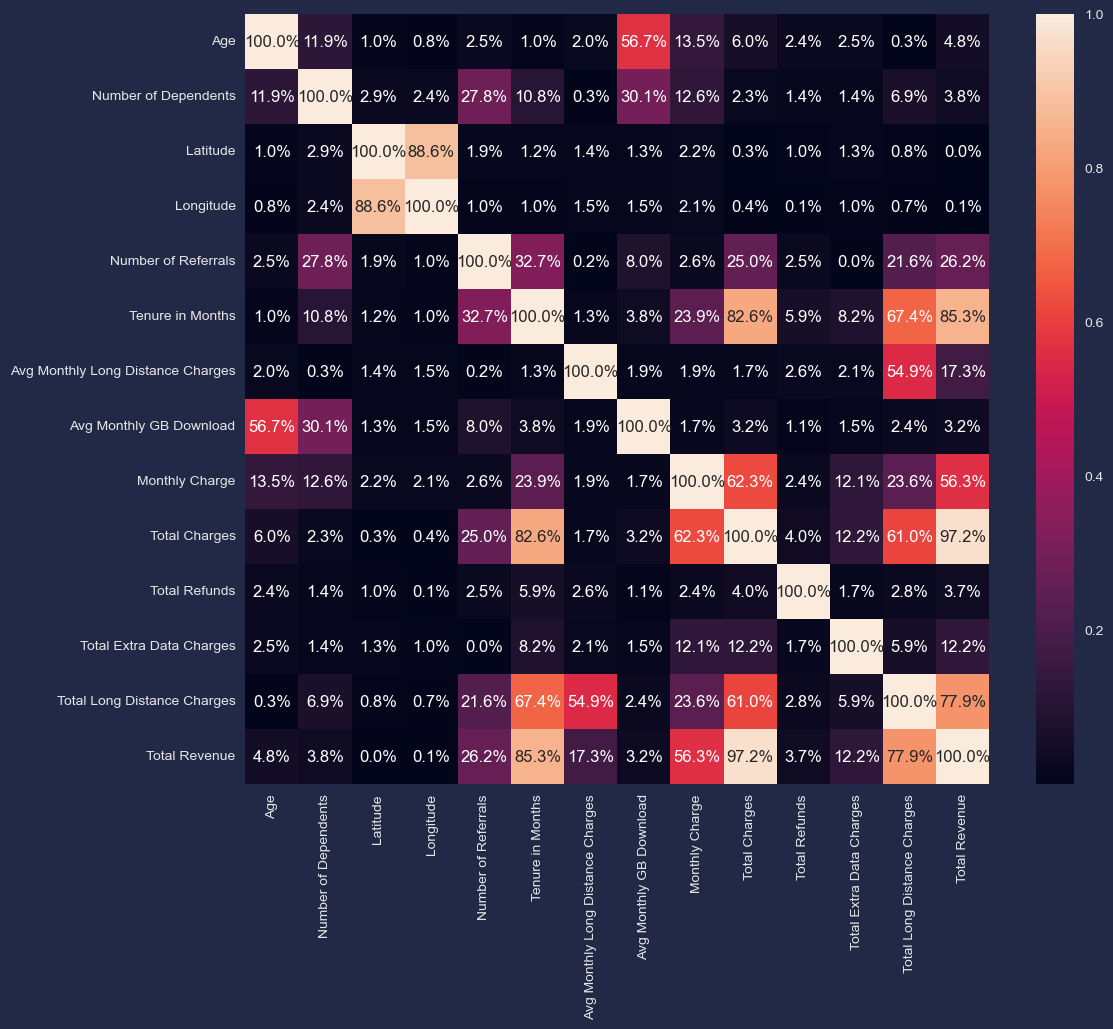

In [714]:
corr_mat = vars_quanti.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_mat.abs(), annot=True, fmt=".1%")

for x in range(len(vars_quanti.columns)):
  corr_mat.iloc[x,x] = 0.0
corr_mat.abs().idxmax()

#### Traitement données manquantes

<Axes: >

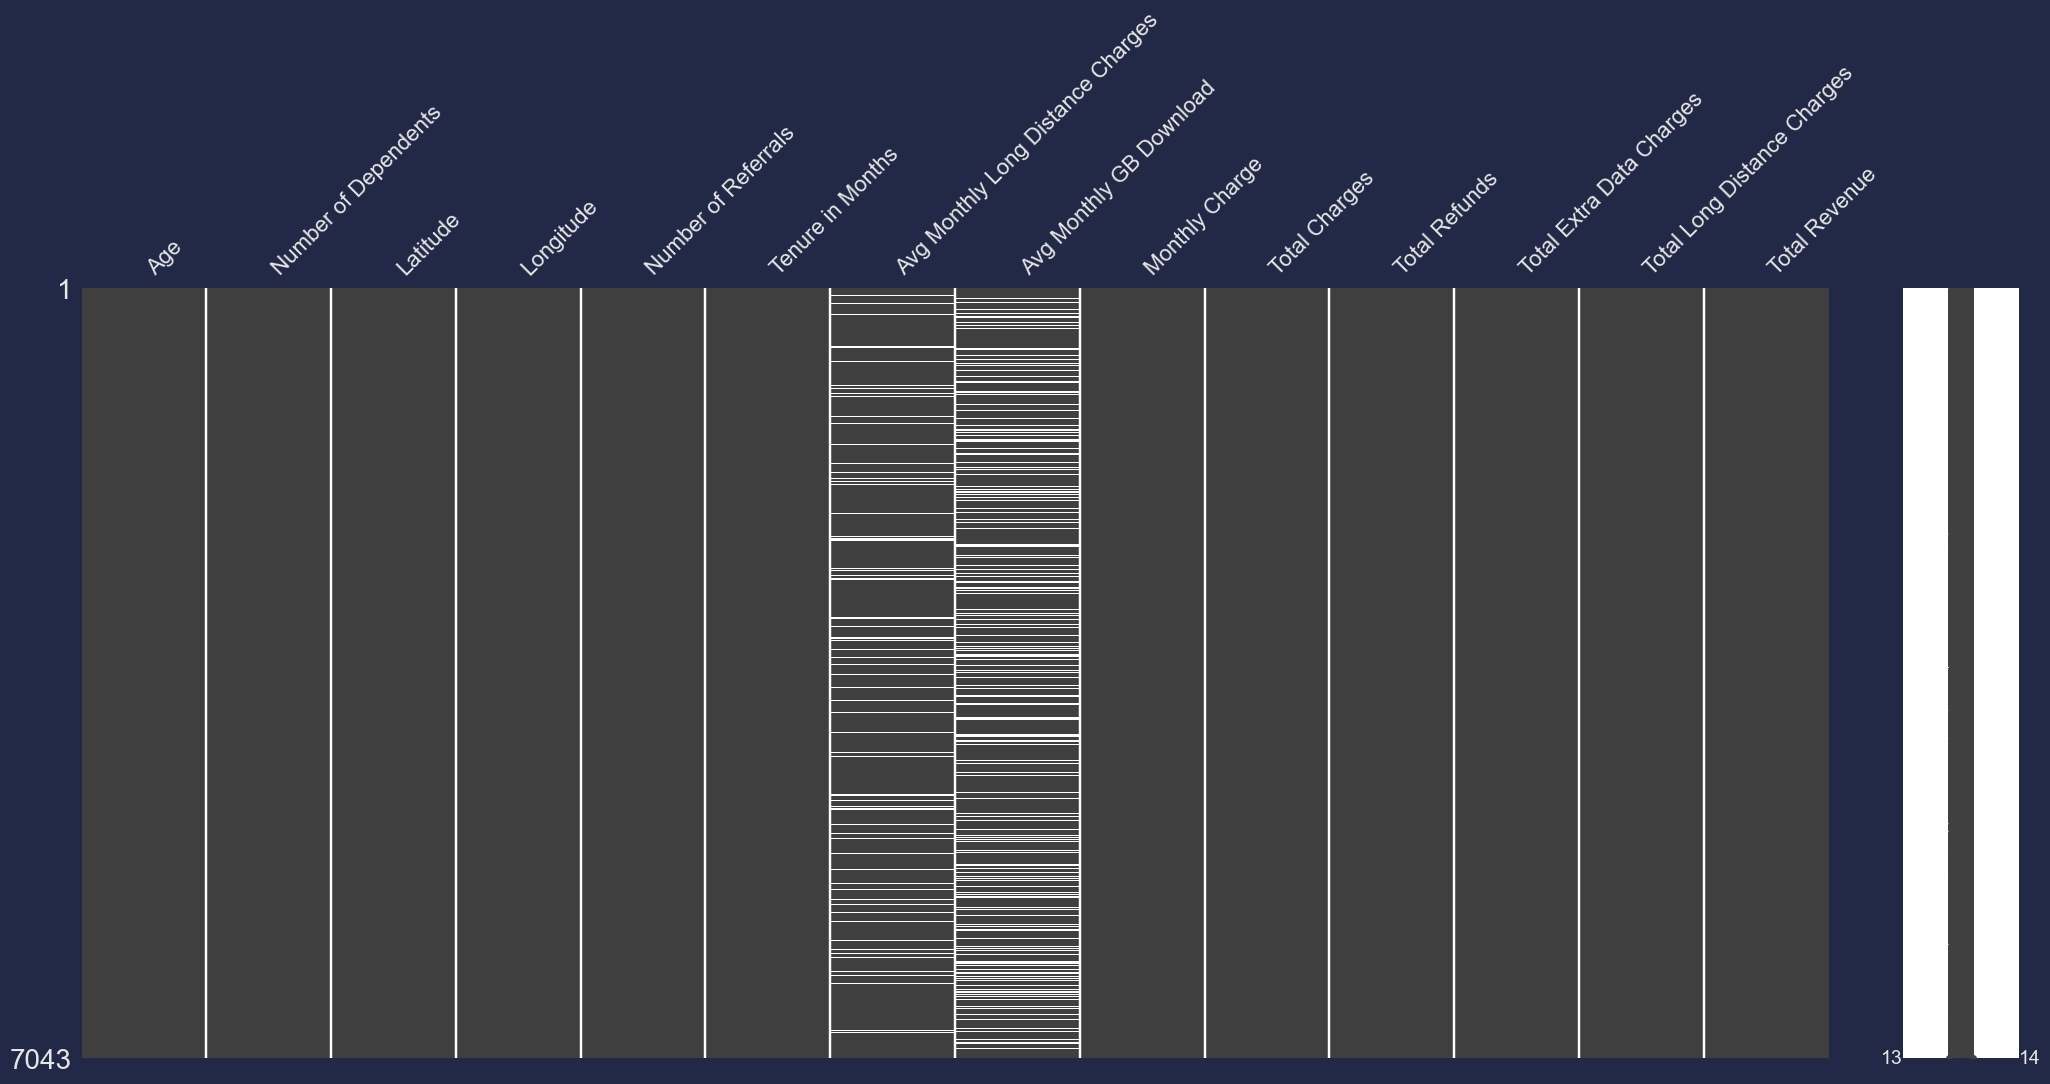

In [716]:
msno.matrix(vars_quanti)

In [717]:
colonnes_manquantes = vars_quanti.columns[vars_quanti.isnull().any()]
print("Colonnes avec données manquantes :")
print(colonnes_manquantes)

Colonnes avec données manquantes :
Index(['Avg Monthly Long Distance Charges', 'Avg Monthly GB Download'], dtype='object')


In [718]:
detect_lien(data_churn, 'Phone Service', ['Avg Monthly Long Distance Charges'])

--- Analyse pour Avg Monthly Long Distance Charges ---
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, Tr

In [719]:
vars_quanti['Avg Monthly Long Distance Charges'] = vars_quanti['Avg Monthly Long Distance Charges'].fillna(0)

In [720]:
detect_lien(data_churn, 'Internet Service', ['Avg Monthly GB Download'])

--- Analyse pour Avg Monthly GB Download ---
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, 

<Axes: >

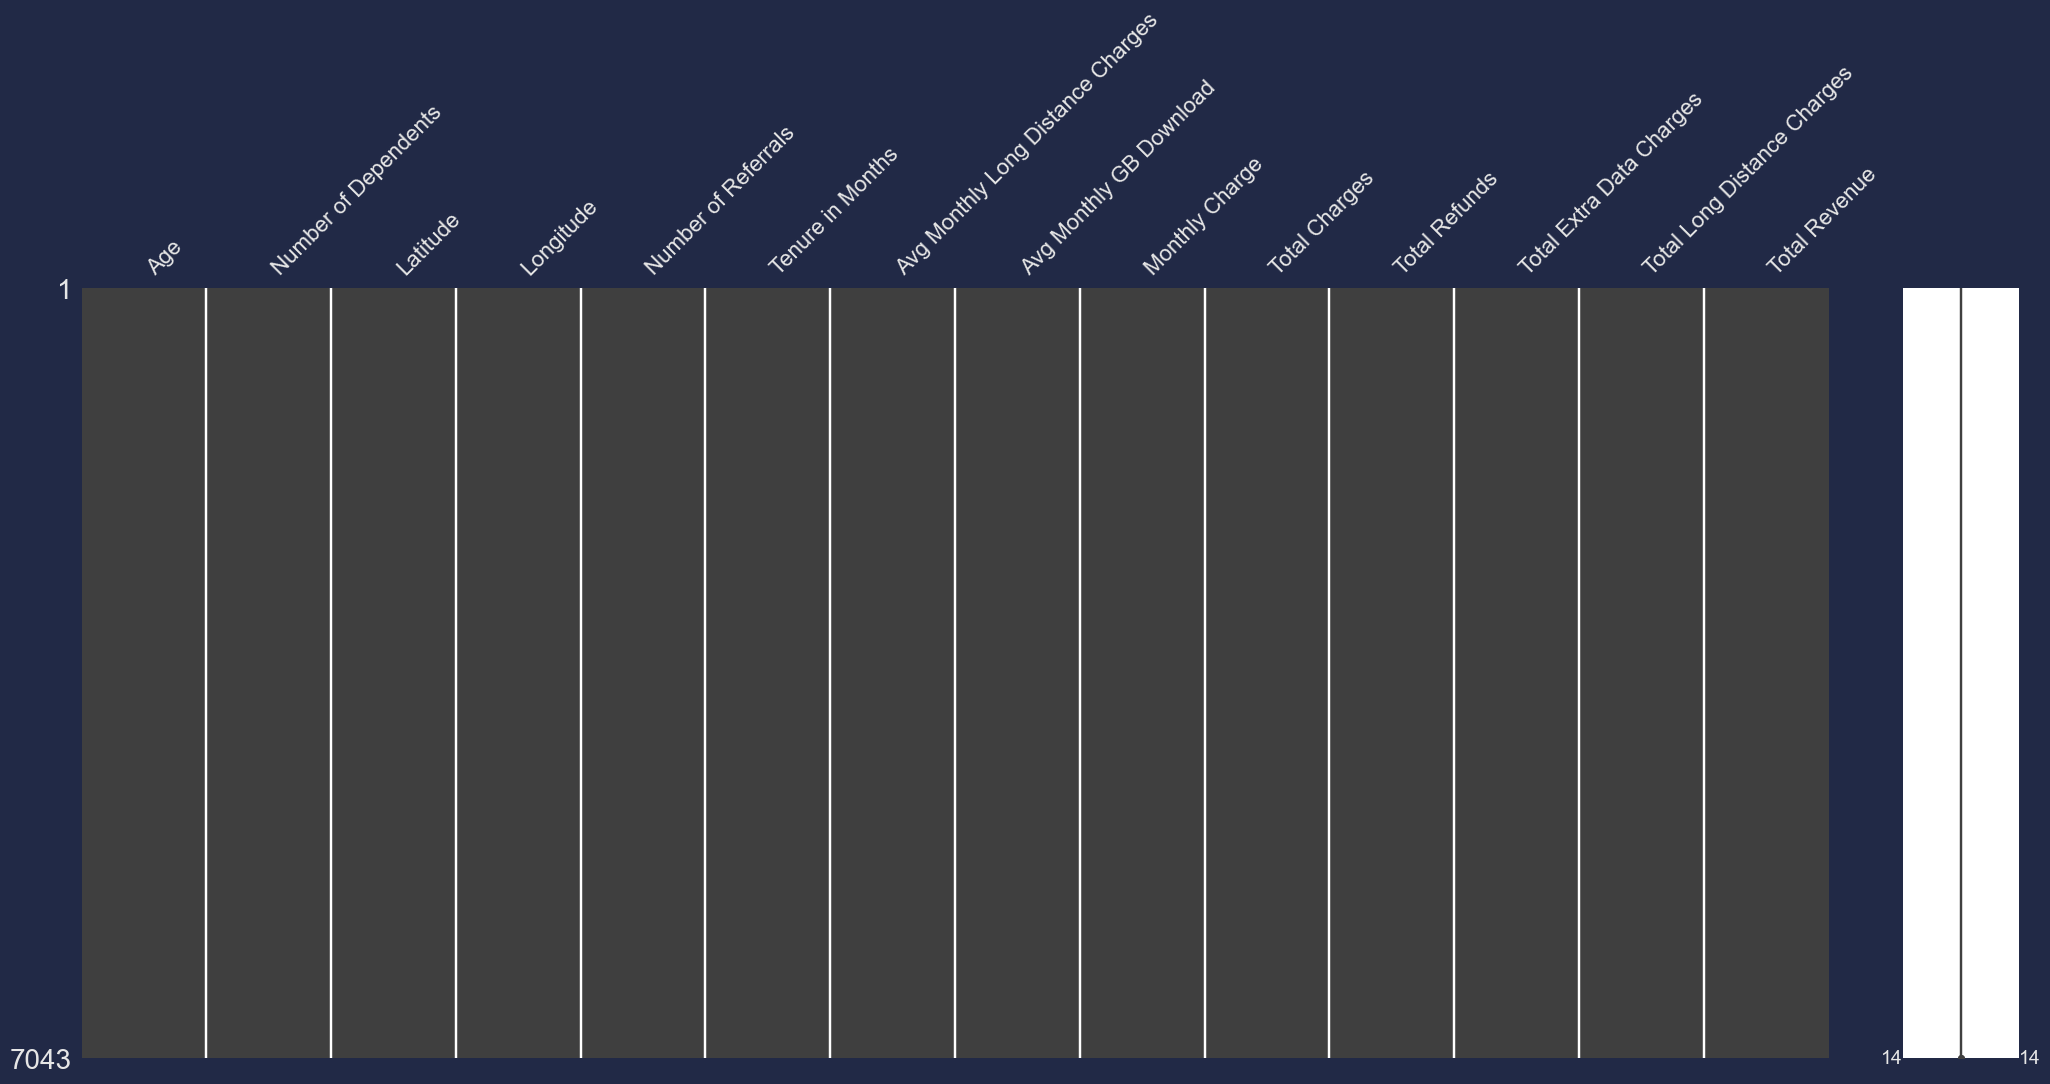

In [721]:
vars_quanti['Avg Monthly GB Download'] = vars_quanti['Avg Monthly GB Download'].fillna(0)
msno.matrix(vars_quanti)

In [722]:
data_clean =pd.concat([vars_quali, vars_quanti], axis=1)

In [723]:
data_clean.shape

(7043, 32)

In [724]:
data_clean_export = pd.concat([data_clean, data_churn[['Churn Category', 'Churn Reason']]], axis=1)
data_clean_export.shape                                                    

(7043, 34)

In [725]:
data_clean_export.to_csv("data_clean_churn.csv", index=False)

### Variables synthétiques

In [727]:
internet_services = [
    'Online Security', 'Online Backup', 'Device Protection Plan',
    'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 
    'Streaming Music', 'Unlimited Data'
]

In [728]:
# Compteur total des services Internet
data_clean['Internet_Services_Count'] = data_clean[internet_services].apply(
    lambda row: sum(1 for val in row if val == 'Yes'), axis=1
)

In [729]:
# Charges mensuels moyens
data_clean['Monthly_charge'] = data_clean['Total Charges'] / data_clean['Tenure in Months']

In [730]:
# Revenus mensuels moyens
data_clean['Monthly_Revenue'] = data_clean['Total Revenue'] / data_clean['Tenure in Months']

In [731]:
# Taux de remboursement
data_clean['Refund_Rate'] = np.where(data_clean['Total Charges'] > 0, 
                            data_clean['Total Refunds'] / data_clean['Total Charges'], 0)

In [732]:
# Taux de charges supplémentaires
data_clean['Extra_Charges_Rate'] = np.where(data_clean['Total Charges'] > 0,
                                   (data_clean['Total Extra Data Charges'] + data_clean['Total Long Distance Charges']) / data_clean['Total Charges'], 0)


In [733]:
vars_supp= [ 'Online Security', 'Online Backup', 'Device Protection Plan',
    'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 
    'Streaming Music', 'Unlimited Data', 'Total Charges', 'Total Refunds', 'Total Revenue',
     'Total Extra Data Charges', 'Total Long Distance Charges', 'Monthly Charge',
            'Avg Monthly Long Distance Charges'
           ]

In [734]:
data_reduis = data_clean.drop(columns=vars_supp)

In [736]:
data_reduis.shape
data_reduis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   7043 non-null   object 
 1   Married                  7043 non-null   object 
 2   City                     7043 non-null   object 
 3   Offer                    7043 non-null   object 
 4   Phone Service            7043 non-null   object 
 5   Multiple Lines           7043 non-null   object 
 6   Internet Service         7043 non-null   object 
 7   Internet Type            7043 non-null   object 
 8   Contract                 7043 non-null   object 
 9   Customer Status          7043 non-null   object 
 10  Age                      7043 non-null   int64  
 11  Number of Dependents     7043 non-null   int64  
 12  Latitude                 7043 non-null   float64
 13  Longitude                7043 non-null   float64
 14  Number of Referrals     

## Pipelines

In [738]:
def impute_missings_data(df):
    
    cols_quali = ['Offer', "Internet Type", "Online Security", "Online Backup", 
            "Device Protection Plan", "Premium Tech Support", "Streaming TV",
            "Streaming Movies", "Streaming Music", "Unlimited Data", 'Multiple Lines']
    
    df[cols_quali] = df[cols_quali].fillna("No")
    df['Avg Monthly GB Download'] = df['Avg Monthly GB Download'].fillna(0)
    df_copy['Avg Monthly Long Distance Charges'] = df_copy['Avg Monthly Long Distance Charges'].fillna(0)

    return df

def new_variables (df):
    internet_services = [
    'Online Security', 'Online Backup', 'Device Protection Plan',
    'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 
    'Streaming Music', 'Unlimited Data']
    # Compteur total des services Internet
    df['Internet_Services_Count'] = df[internet_services].apply(
        lambda row: sum(1 for val in row if val == 'Yes'), axis=1)

    # Charges mensuels moyens
    df['Monthly_charge'] = df['Total Charges'] / df['Tenure in Months']
    
    # Revenus mensuels moyens
    df['Monthly_Revenue'] = df['Total Revenue'] / df['Tenure in Months']

    # Taux de remboursement
    df['Refund_Rate'] = np.where(df['Total Charges'] > 0, 
                                df['Total Refunds'] / df['Total Charges'], 0)
    # Taux de charges supplémentaires
    df['Extra_Charges_Rate'] = np.where(df['Total Charges'] > 0,
                                       (df['Total Extra Data Charges'] + df['Total Long Distance Charges']) / df['Total Charges'], 0)

    return df

def delete_vars (df):
    vars_supp= ['Customer ID', 'Paperless Billing', 'Zip Code', 'Payment Method', 'Online Security', 'Online Backup', 'Device Protection Plan',
    'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 
    'Streaming Music', 'Unlimited Data', 'Total Charges', 'Total Refunds', 'Total Revenue',
     'Total Extra Data Charges', 'Total Long Distance Charges', 'Monthly Charge',
            'Avg Monthly Long Distance Charges','Churn Category', 'Churn Reason']
    df = df.drop(columns=vars_supp)

    return df

In [740]:
preprocessing_pipeline = Pipeline(steps=[
    ('Imputation données manquantes', FunctionTransformer(impute_missings_data, validate=False)),
    ('Variables synthétique', FunctionTransformer(new_variables, validate=False)),
    ('Supprime variables', FunctionTransformer(delete_vars, validate=False))
])
preprocessing_pipeline

Pipeline(steps=[('Imputation données manquantes',
                 FunctionTransformer(func=<function impute_missings_data at 0x0000013677144720>)),
                ('Variables synthétique',
                 FunctionTransformer(func=<function new_variables at 0x000001366593E660>)),
                ('Supprime variables',
                 FunctionTransformer(func=<function delete_vars at 0x000001365A999EE0>))])

In [744]:
# Colonnes catégorielles nominales (OneHot)
onehot_cols = ['City', 'Offer', 'Internet Type', 'Contract', 'Customer Status']

# Colonnes catégorielles binaires (LabelEncoder peut être utilisé individuellement, mais OneHot aussi marche)
binary_cols = ['Gender', 'Married', 'Phone Service', 'Multiple Lines', 'Internet Service']

# Colonnes numériques (StandardScaler)
numeric_cols = ['Age', 'Number of Dependents', 'Latitude', 'Longitude',
                'Number of Referrals', 'Tenure in Months', 'Avg Monthly GB Download',
                'Internet_Services_Count', 'Monthly_charge', 'Monthly_Revenue',
                'Refund_Rate', 'Extra_Charges_Rate']

# Pipeline de transformation
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat_nom', OneHotEncoder(drop='first'), onehot_cols),
    ('cat_bin', OneHotEncoder(drop='first'), binary_cols)
])
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Age', 'Number of Dependents', 'Latitude',
                                  'Longitude', 'Number of Referrals',
                                  'Tenure in Months', 'Avg Monthly GB Download',
                                  'Internet_Services_Count', 'Monthly_charge',
                                  'Monthly_Revenue', 'Refund_Rate',
                                  'Extra_Charges_Rate']),
                                ('cat_nom', OneHotEncoder(drop='first'),
                                 ['City', 'Offer', 'Internet Type', 'Contract',
                                  'Customer Status']),
                                ('cat_bin', OneHotEncoder(drop='first'),
                                 ['Gender', 'Married', 'Phone Service',
                                  'Multiple Lines', 'Internet Service'])])

In [748]:
full_data_preparation_pipeline = Pipeline(steps=[
    ('custom_preprocessing', preprocessing_pipeline),
    ('feature_encoding_scaling', preprocessor)
])
full_data_preparation_pipeline

Pipeline(steps=[('custom_preprocessing',
                 Pipeline(steps=[('Imputation données manquantes',
                                  FunctionTransformer(func=<function impute_missings_data at 0x0000013677144720>)),
                                 ('Variables synthétique',
                                  FunctionTransformer(func=<function new_variables at 0x000001366593E660>)),
                                 ('Supprime variables',
                                  FunctionTransformer(func=<function delete_vars at 0x000001365A999EE0>))]...
                                                   'Tenure in Months',
                                                   'Avg Monthly GB Download',
                                                   'Internet_Services_Count',
                                                   'Monthly_charge',
                                                   'Monthly_Revenue',
                                                   'Refund_Rate',
                                                   'Extra_Charges_Rate']),
                                                 ('cat_nom',
                                                  OneHotEncoder(drop='first'),
                                                  ['City', 'Offer',
                                                   'Internet Type', 'Contract',
                                                   'Customer Status']),
                                                 ('cat_bin',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Married',
                                                   'Phone Service',
                                                   'Multiple Lines',
                                                   'Internet Service'])]))])